## Informasi Mahasiswa

Nama: Muhammad Kemal Fasya

NPM : 2108107010052

Dataset dari kaggle https://www.kaggle.com/datasets/mirichoi0218/insurance/data

<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

<font size='2'>Banyak faktor yang memengaruhi jumlah Anda membayar asuransi kesehatan berada di luar kendali Anda. Meskipun demikian, ada baiknya untuk memiliki pemahaman tentang apa itu. Berikut beberapa faktor yang mempengaruhi besarnya biaya premi asuransi kesehatan

* **usia:** usia penerima manfaat utama

* **jenis kelamin:** jenis kelamin kontraktor asuransi, perempuan, laki-laki

* **bmi:** Indeks massa tubuh, memberikan pemahaman tentang tubuh, berat badan yang relatif tinggi atau rendah relatif terhadap tinggi badan, indeks objektif berat badan (kg/m^2) menggunakan rasio tinggi terhadap berat badan, idealnya 18,5 hingga 24,9

* **anak-anak:** Jumlah anak yang ditanggung oleh asuransi kesehatan / Jumlah tanggungan

* **perokok:** Merokok

* **wilayah:** wilayah pemukiman penerima manfaat di AS, timur laut, tenggara, barat daya, barat laut

<font size=5><p style="color:purple"> EDA and Visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/regresi/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size='2' font>We have 0 missing values which is very good.
Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors 

Text(0.5, 1.0, 'Distribution of Charges')

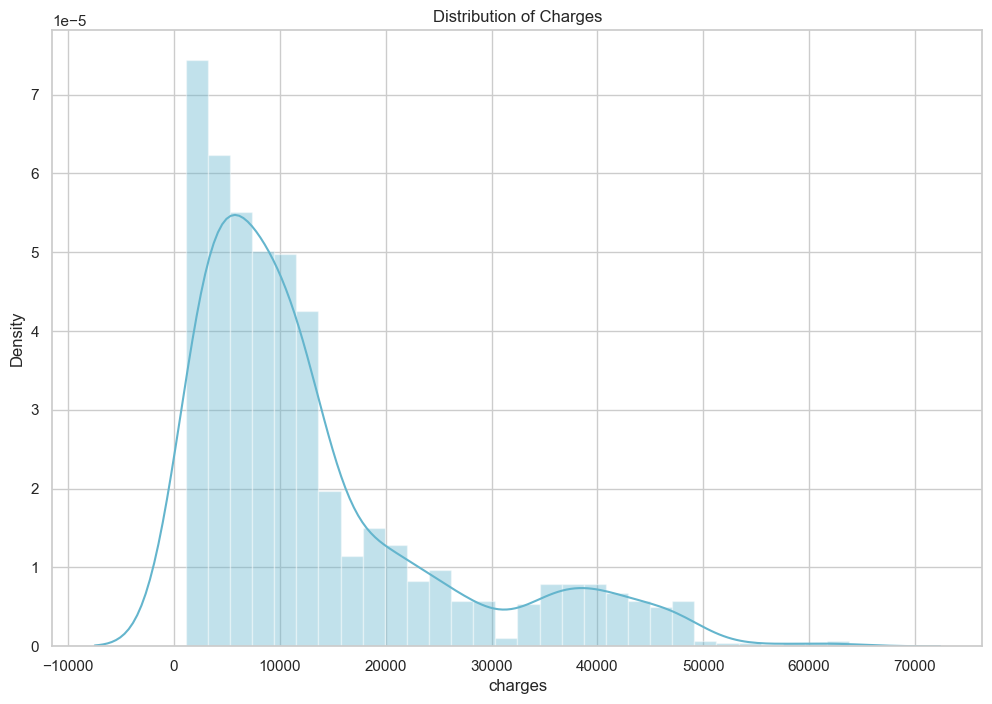

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

<font size='2' font>This distribution is right-skewed. To make it closer to normal we can apply natural log 

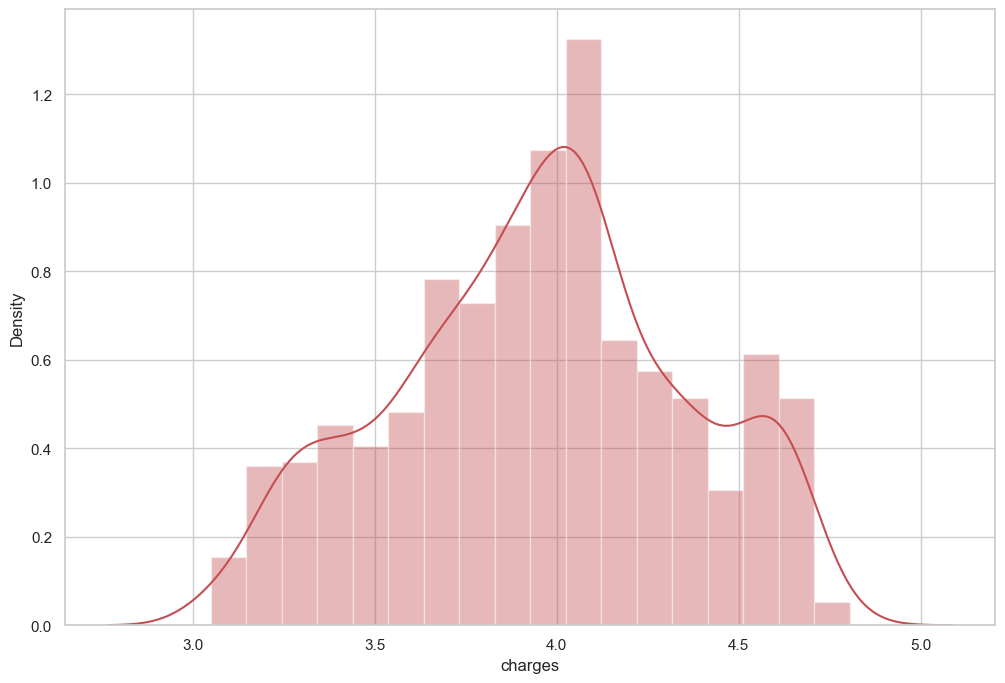

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

<font size=2> Now let's look at the charges by region

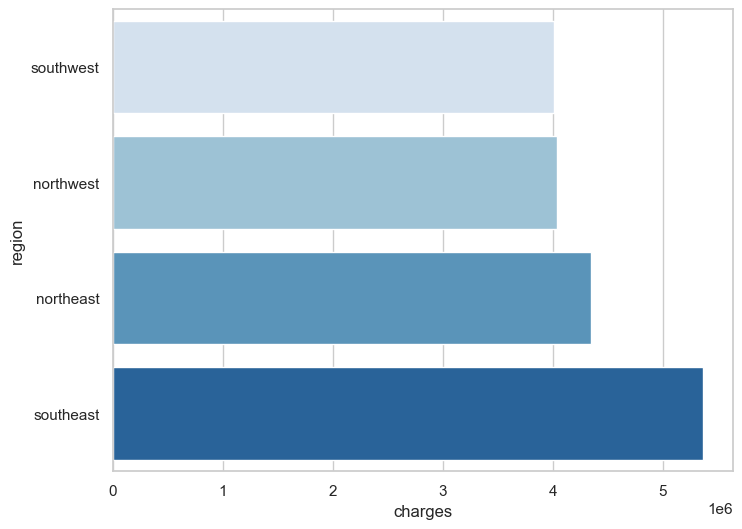

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')


<font size='2' font>So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region 

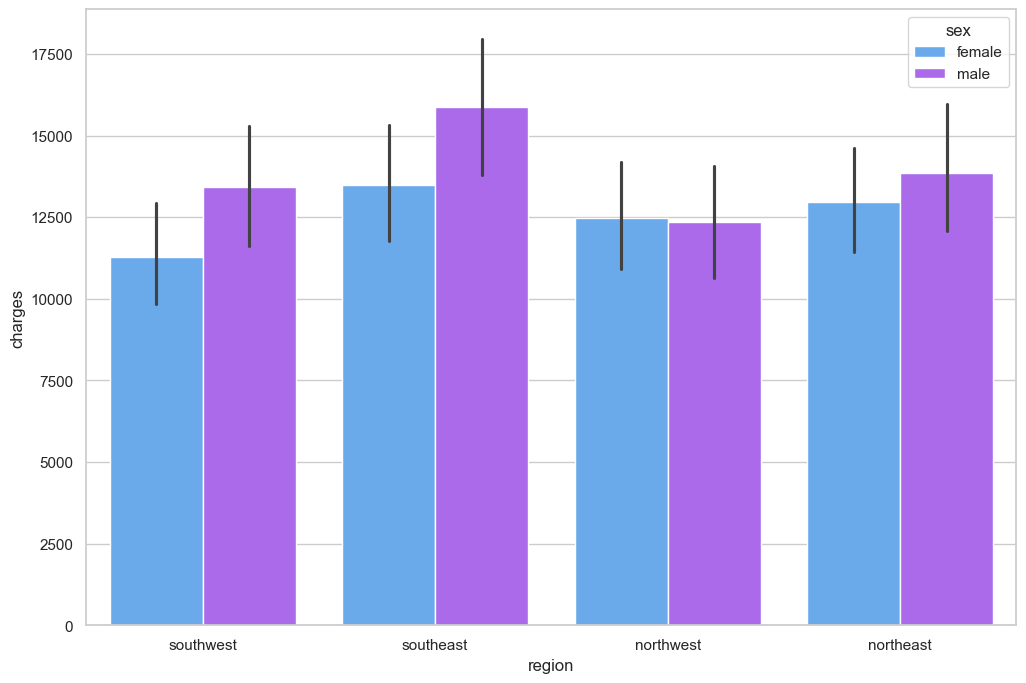

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

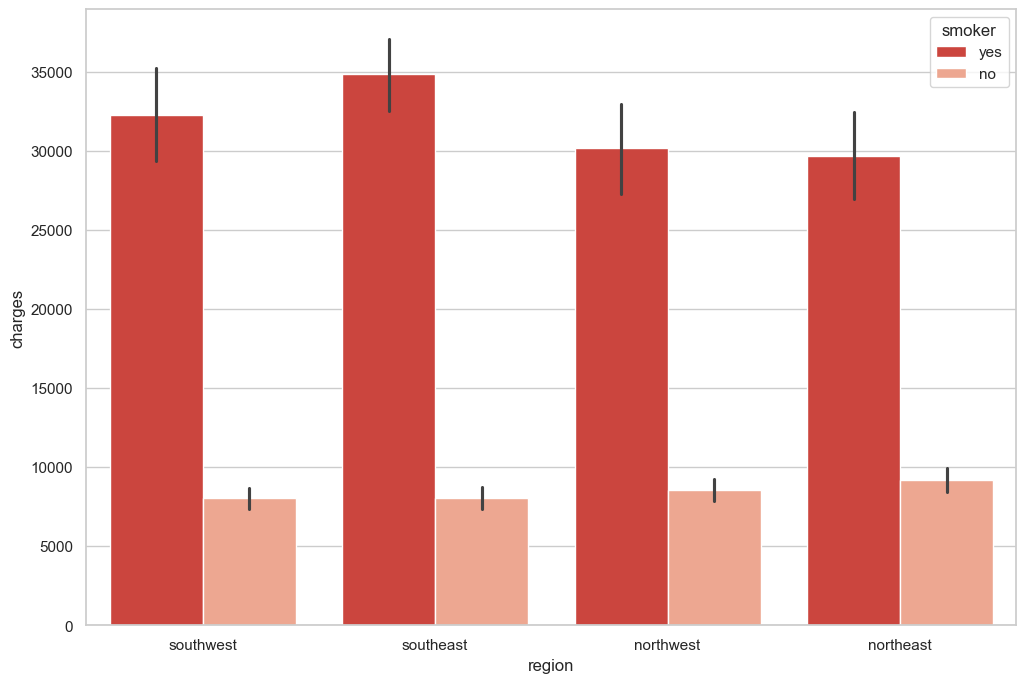

In [11]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

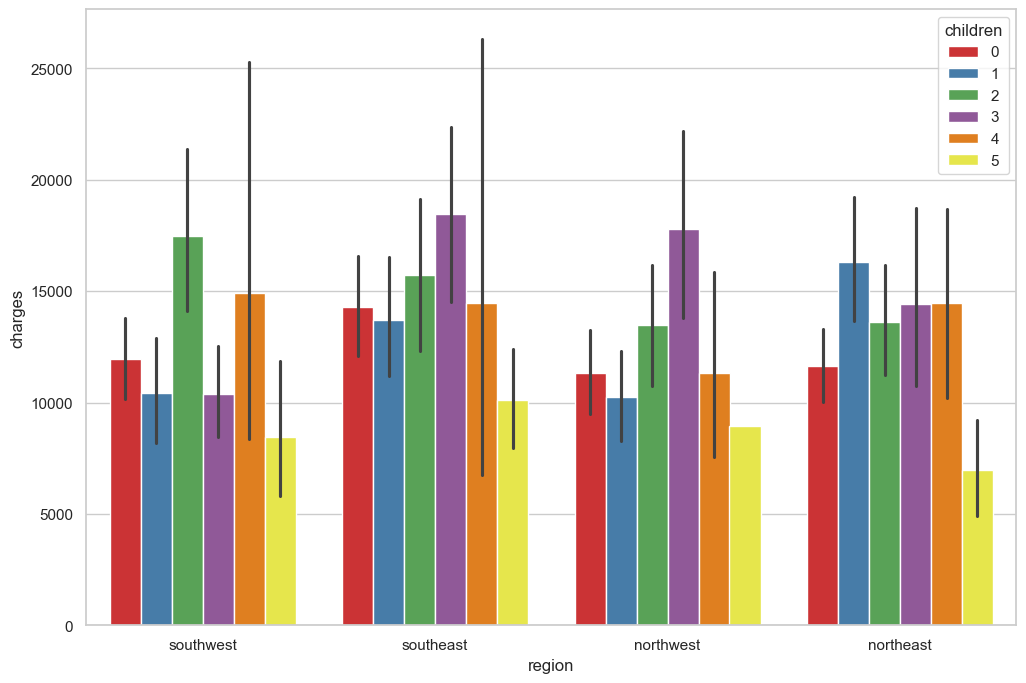

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

<font size='2' font>As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

<font size='2' font>Now let's analyze the medical charges by age, bmi and children according to the smoking factor 

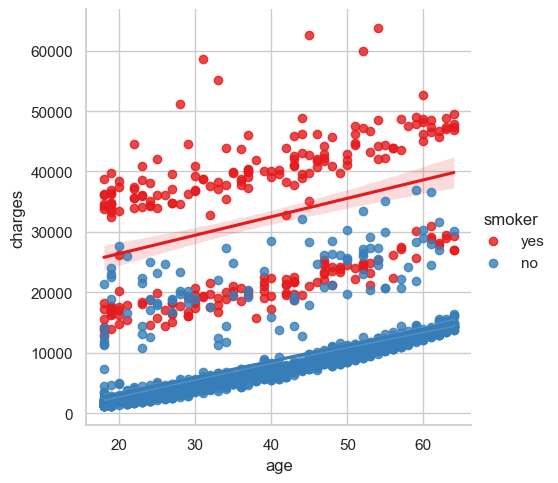

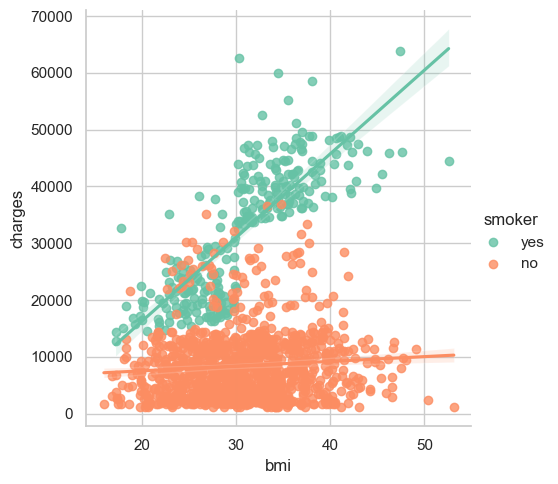

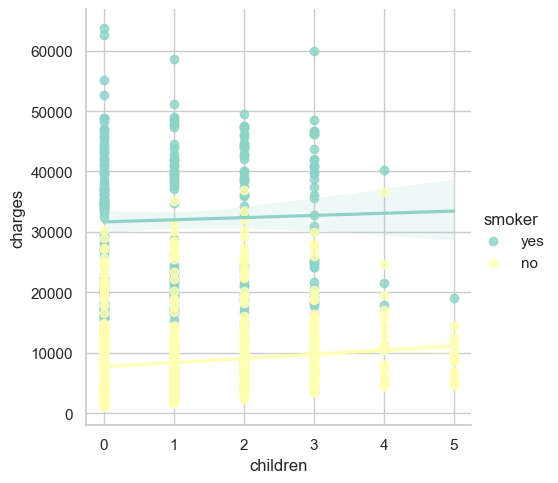

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

<font size='2' font>Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

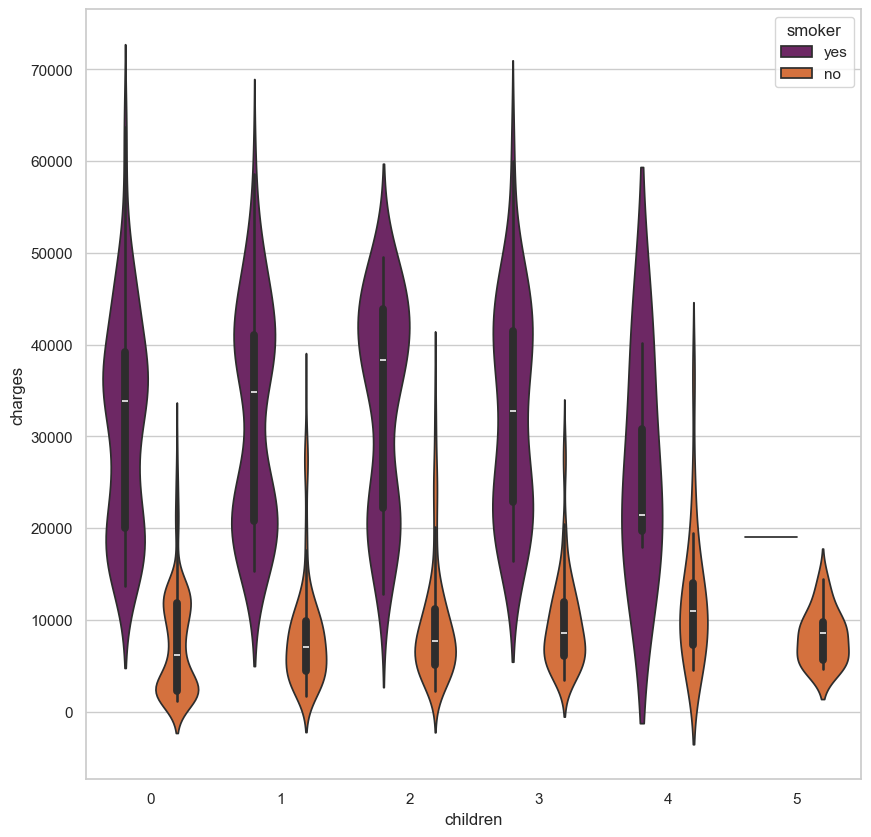

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [15]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

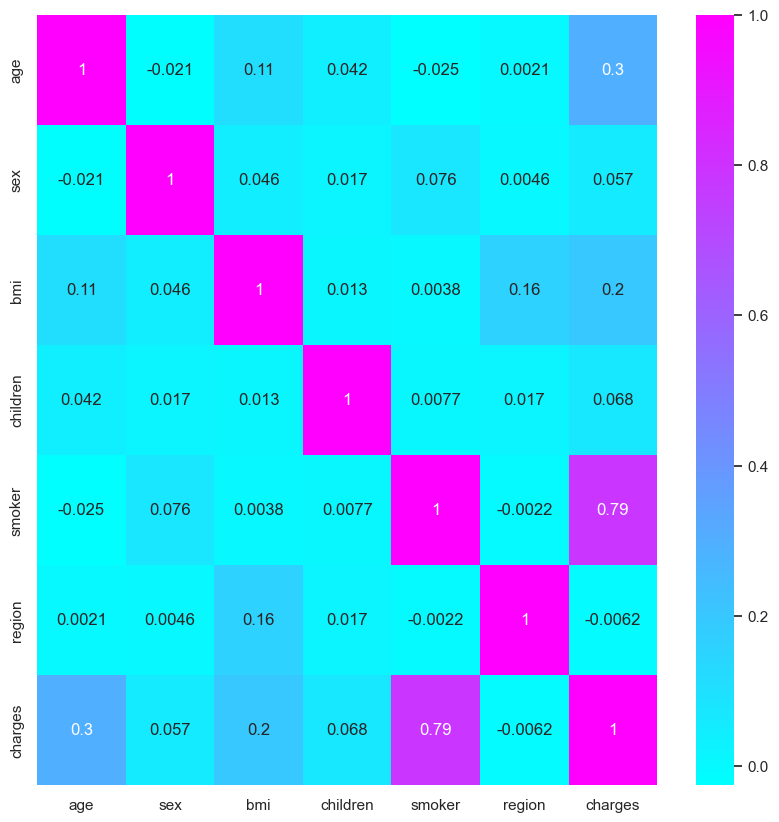

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<font size='2' font>No correlation, except with the smoking 

<font size=5><p style="color:purple"> Split Dataset dan Normalisasi Data

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = df.drop('age', axis=1)
y = df['charges']

# Scaling the data independent variable
x_scaled = scaler.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [83]:
from sklearn import metrics

# Fungsi untuk menampilkan hasil evaluasi model
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

<font size=5><p style="color:purple"> SVM 

In [84]:
from sklearn.svm import SVR

# Instantiate SVR with polynomial kernel
svr_poly = SVR(kernel='poly', C=10, gamma=0.1,coef0=1,epsilon=0.2, degree=3)
svr_poly_trial = SVR(kernel='poly', C=10, degree=3)

# Train SVR model
svr_poly.fit(X_train, y_train)
svr_poly_trial.fit(X_train, y_train)

# Predict using the trained model
y_pred = svr_poly.predict(X_test)
y_pred_trial = svr_poly_trial.predict(X_test)

# Evaluate the model
print_evaluate(y_test, y_pred) 

print('Trial Model tanpa paramater apa pun :')
print_evaluate(y_test, y_pred_trial)

MAE: 5592.742351644047
MSE: 58125475.09613171
RMSE: 7624.00649895655
R2 Square 0.625597745388266
__________________________________
Trial Model tanpa paramater apa pun :
MAE: 7212.513877689919
MSE: 98027671.65510361
RMSE: 9900.892467606322
R2 Square 0.36857666588858395
__________________________________


<font size=5><p style="color:purple"> Visualisasi Model

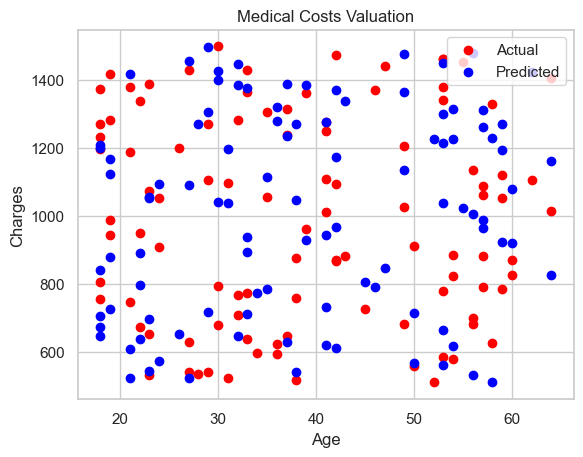

In [86]:
import numpy as np

# Generate some random data for demonstration purposes
np.random.seed(0)
X_test = np.random.randint(18, 65, size=(100, 1))
y_test = np.random.randint(500, 1500, size=(100, 1))
y_pred = np.random.randint(500, 1500, size=(100, 1))

# Scatter plot of test data dan predicted data
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.title('Medical Costs Valuation')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


dari hasil plot diatas, model SVR dengan kernel polynomial cukup baik dalam memprediksi harga medis berdasarkan umur

Polynomial equation:
         3         2
0.01671 x - 2.179 x + 91.79 x - 204.8


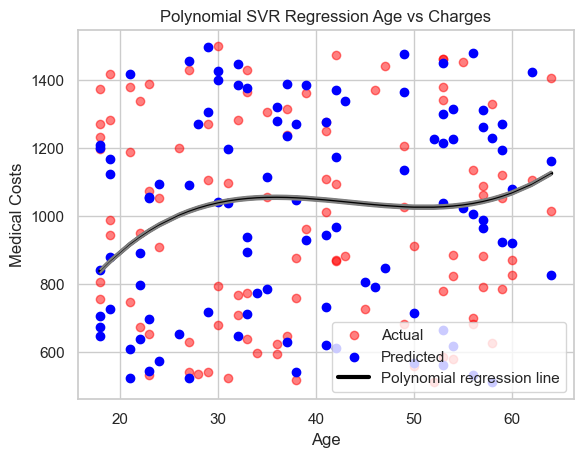

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the test data and predicted data
sorted_indices = np.argsort(X_test.flatten(), axis=0)
X_test_sorted = X_test.flatten()[sorted_indices].reshape(-1,1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted.flatten(), 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Polynomial equation:")
print(polynomial)

# Plot data points
plt.scatter(X_test.flatten(), y_test,alpha=0.5, color='red', label='Actual')
plt.scatter(X_test.flatten(), y_pred, color='blue', label='Predicted')

# Plot polynomial curve
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Polynomial regression line', linewidth=3)
plt.plot(X_test_sorted, polynomial(X_test_sorted)-5, color='gray', )
plt.plot(X_test_sorted, polynomial(X_test_sorted)+5, color='gray')
plt.title('Polynomial SVR Regression Age vs Charges') 
plt.xlabel('Age')
plt.ylabel('Medical Costs')
plt.legend()
plt.show()